# Prediction of Agriculture Crop Production in India

In [1]:

#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [10]:
#loading datasets

data1 = pd.read_csv('datafile.csv')
data2 = pd.read_csv('datafile (2).csv')
data3 = pd.read_csv('datafile (3).csv')
data4 = pd.read_csv('produce.csv')
data5 = pd.read_csv('datafile (1).csv')

In [13]:
data5.head(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [14]:
data5.shape

(49, 6)

In [16]:
data5.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [17]:
data5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [18]:
data5.isnull().sum()


Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [19]:
data5.duplicated().sum()

0

In [22]:
data2.head(10)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
5,Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
9,Coarse Cereals,138.5,166.4,163.5,137.0,178.4,106.4,105.6,101.8,102.6,105.4,130.1,157.6,160.7,133.5,169.2


In [23]:
data2.shape

(55, 16)

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                55 non-null     object 
 1   Production 2006-07  55 non-null     float64
 2   Production 2007-08  55 non-null     float64
 3   Production 2008-09  55 non-null     float64
 4   Production 2009-10  55 non-null     float64
 5   Production 2010-11  55 non-null     float64
 6   Area 2006-07        55 non-null     float64
 7   Area 2007-08        55 non-null     float64
 8   Area 2008-09        55 non-null     float64
 9   Area 2009-10        55 non-null     float64
 10  Area 2010-11        55 non-null     float64
 11  Yield 2006-07       55 non-null     float64
 12  Yield 2007-08       55 non-null     float64
 13  Yield 2008-09       55 non-null     float64
 14  Yield 2009-10       55 non-null     float64
 15  Yield 2010-11       55 non-null     float64
dtypes: float64

In [25]:
data2.describe()

,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,168.698182,182.629091,179.952727,173.749091,210.181818,116.025455,118.403636,120.530909,118.203636,127.216364,146.829091,153.774545,149.476364,147.427273,164.570909
std,179.503163,199.671545,187.409253,184.231322,232.535985,37.990960,41.287797,44.460177,44.976615,54.842653,144.836331,153.243102,141.412539,143.963743,160.925948
min,53.900000,54.400000,50.000000,42.900000,42.100000,47.900000,47.400000,43.600000,37.500000,36.100000,86.000000,75.300000,72.700000,80.700000,80.800000
25%,124.500000,122.200000,116.050000,105.350000,126.900000,92.550000,93.300000,93.200000,88.650000,90.650000,106.800000,116.800000,110.950000,108.300000,121.050000
50%,142.700000,160.100000,156.500000,140.300000,169.000000,120.700000,121.700000,121.900000,120.900000,129.400000,118.700000,124.500000,123.600000,122.100000,138.900000
75%,184.300000,200.100000,188.550000,197.050000,217.350000,131.050000,135.800000,136.250000,134.800000,147.950000,137.600000,154.400000,148.500000,142.800000,168.850000
max,1427.700000,1571.500000,1463.000000,1430.300000,1790.600000,222.700000,241.600000,254.500000,260.300000,314.700000,1176.600000,1247.700000,1156.800000,1172.100000,1310.800000


In [26]:
data2.isnull().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

In [27]:
data2.duplicated().sum()

0

In [30]:
data3.head(-4)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ...",NaN
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr...",NaN
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra...",NaN
...,...,...,...,...,...
69,Cowpea (Fodder),UPC 628,145-150,"States of Uttarakhand, HP, J & K, Punjab, Hary...",NaN
70,Jute,SUDHANGSU (JBO-1),NaN,"West Bengal, Assam, Bihar and Orissa.",NaN
71,Jute,ARPITA (JBC-5),-,West Bengal and Assam under rainfed agro system.,NaN
72,Mesta,SNEHA (JRM-3),-,Traditional Mesta Growing belt of the Country ...,NaN


In [31]:
data3.shape

(78, 5)

In [32]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Crop                      78 non-null     object 
 1   Variety                   78 non-null     object 
 2   Season/ duration in days  50 non-null     object 
 3   Recommended Zone          77 non-null     object 
 4   Unnamed: 4                0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


In [36]:
data3=data3.drop(data3.columns[[4]],axis=1)

In [38]:
data3.head(10)

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
1,Paddy,(CNI 383-5-11),NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."
6,Paddy,CR Dhan 501 (IET 19189),152,Semi deep water condition of Uttar Pradesh and...
7,Paddy,RC Maniphou 11 (IET 20193),132-135,Terraced area of Meghalaya and Manipur hills b...
8,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja..."
9,Wheat,MACS 6222,108,"Maharashtra, Karnataka, Andhra Pradesh and Tam..."


In [39]:
data3.shape

(78, 4)

In [40]:
data3.describe()

,Crop,Variety,Season/ duration in days,Recommended Zone
count,78,78,50,77
unique,29,78,39,76
top,Wheat,Chinsurah Rice (IET 19140),110,"Punjab, Haryana, Rajasthan, Uttarakhand, Centr..."
freq,9,1,3,2


In [41]:
data3.isnull().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
dtype: int64

In [42]:
data3=data3.fillna('')

In [43]:
data3.isnull().sum()

Crop                        0
Variety                     0
Season/ duration in days    0
Recommended Zone            0
dtype: int64

In [44]:
data3.duplicated().sum()

0

In [45]:
data1.head(10)

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-10  12 non-null     float64
 7   2010-11  12 non-null     float64
 8   2011-12  12 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.0+ KB


In [47]:
data1.describe()

,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
count,12.0,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,100.0,99.75000,102.000000,104.750000,106.416667,114.916667,121.916667,120.750000
std,0.0,6.64865,12.634728,10.963783,11.261022,15.900019,11.405408,12.800036
min,100.0,86.00000,85.000000,87.000000,80.000000,81.000000,99.000000,102.000000
25%,100.0,96.75000,96.250000,97.750000,101.250000,106.250000,116.250000,109.500000
50%,100.0,100.00000,100.000000,102.000000,107.500000,115.500000,122.500000,120.500000
75%,100.0,103.25000,104.750000,115.000000,113.000000,123.250000,129.250000,130.750000
max,100.0,109.00000,134.000000,124.000000,124.000000,146.000000,138.000000,140.000000


In [49]:
data1.isnull().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [50]:
data1=data1.dropna()

In [51]:
data1.isnull().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [52]:
data1.duplicated().sum()

0

In [53]:
data1.shape

(12, 9)

In [55]:
data4.head(15)

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093
5,Agricultural Production Foodgrains Rice Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.90170,13.5215,13.18450,14.03350,14.274300,13.176391,15.328578,12.520400,12.87,14.2779
6,Agricultural Production Foodgrains Wheat Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.63690,69.3545,75.80670,78.57020,80.679400,80.803558,86.873953,94.882063,93.51,95.8492
7,Agricultural Production Foodgrains Jowar,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.24430,7.6296,7.15080,7.92590,7.245600,6.698203,7.003147,5.979153,5.28,5.2467
8,Agricultural Production Foodgrains Jowar Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.04440,4.0716,3.70680,4.11490,3.051900,2.763233,3.439147,3.293000,2.84,2.2292
9,Agricultural Production Foodgrains Jowar Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.19990,3.5580,3.44400,3.81100,4.193700,3.934970,3.564000,2.686153,2.44,3.0175


In [56]:
data4.shape

(429, 25)

In [59]:
data4=data4.drop(data4.columns[[3,4,5,6,7,8,9,10,11,12,13,14]],axis=1)

In [61]:
data4.head()

,Particulars,Frequency,Unit,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093


In [62]:
data4.shape

(429, 13)

In [63]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  429 non-null    object 
 1   Frequency    429 non-null    object 
 2   Unit         429 non-null    object 
 3    3-2005      425 non-null    float64
 4    3-2006      423 non-null    float64
 5    3-2007      418 non-null    float64
 6    3-2008      417 non-null    float64
 7    3-2009      418 non-null    float64
 8    3-2010      403 non-null    float64
 9    3-2011      404 non-null    float64
 10   3-2012      388 non-null    float64
 11   3-2013      298 non-null    float64
 12   3-2014      63 non-null     float64
dtypes: float64(10), object(3)
memory usage: 43.7+ KB


In [65]:
data4.describe()

,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
count,425.000000,423.000000,418.000000,417.000000,418.000000,403.000000,404.000000,388.000000,298.000000,63.000000
mean,1103.899915,1136.604858,1146.262067,1213.930482,1234.754599,1144.015426,1228.541458,1352.353707,1355.741134,252.303495
std,3910.204724,3925.459550,3936.081939,4046.762259,4146.021269,4054.786966,4186.449378,4366.571068,2950.845362,670.745277
min,0.000000,0.000000,0.060000,0.060000,0.050000,0.058400,0.045000,0.050000,0.050000,0.087500
25%,5.100000,5.589950,5.717500,5.748600,5.827500,5.378950,5.632750,5.780000,4.322500,2.853700
50%,36.800000,36.520000,37.715000,40.760000,42.885000,43.770000,45.500000,43.830000,77.850000,13.451800
75%,1082.000000,1127.000000,1193.250000,1349.000000,1297.250000,1228.000000,1365.250000,1592.250000,1857.000000,93.929250
max,65945.000000,64473.000000,64969.000000,66151.000000,67024.000000,67929.000000,68554.000000,69118.000000,30300.000000,3059.000000


In [66]:

data4.columns=['Particulars','Frequency','Unit','production3-2005','production3-2006','production3-2007','production3-2008','production3-2009','production3-2010','production3-2011','production3-2012','production3-2013','production3-2014']

In [67]:
data4.head()

,Particulars,Frequency,Unit,production3-2005,production3-2006,production3-2007,production3-2008,production3-2009,production3-2010,production3-2011,production3-2012,production3-2013,production3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093


In [69]:
data4.isnull().sum()

Particulars           0
Frequency             0
Unit                  0
production3-2005      4
production3-2006      6
production3-2007     11
production3-2008     12
production3-2009     11
production3-2010     26
production3-2011     25
production3-2012     41
production3-2013    131
production3-2014    366
dtype: int64

In [73]:
data4['production3-2005'].fillna(data4['production3-2005'].mean(),inplace=True)

In [75]:
data4['production3-2006'].fillna(data4['production3-2006'].mean(),inplace=True)
data4['production3-2007'].fillna(data4['production3-2007'].mean(),inplace=True)
data4['production3-2008'].fillna(data4['production3-2008'].mean(),inplace=True)
data4['production3-2009'].fillna(data4['production3-2009'].mean(),inplace=True)
data4['production3-2010'].fillna(data4['production3-2010'].mean(),inplace=True)
data4['production3-2011'].fillna(data4['production3-2011'].mean(),inplace=True)
data4['production3-2012'].fillna(data4['production3-2012'].mean(),inplace=True)
data4['production3-2013'].fillna(data4['production3-2013'].mean(),inplace=True)
data4['production3-2014'].fillna(data4['production3-2014'].mean(),inplace=True)

In [76]:
data4.isnull().sum()

Particulars         0
Frequency           0
Unit                0
production3-2005    0
production3-2006    0
production3-2007    0
production3-2008    0
production3-2009    0
production3-2010    0
production3-2011    0
production3-2012    0
production3-2013    0
production3-2014    0
dtype: int64

In [78]:

data4.duplicated().sum()

0

In [82]:
data2.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [83]:
data2.rename(columns={'Crop             ':'Crop'},inplace=True)

In [84]:
data2.columns

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [85]:
data5.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [87]:
data1['Crop'].value_counts()

Crop
Rice                   1
Wheat                  1
Coarse Cereals         1
Pulses                 1
Vegetables             1
Fruits                 1
Milk                   1
Eggs, Fish and Meat    1
Oilseeds               1
Sugarcane              1
Fibers                 1
All Agriculture        1
Name: count, dtype: int64

In [88]:
data1.head()

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


In [89]:
data4.head()

,Particulars,Frequency,Unit,production3-2005,production3-2006,production3-2007,production3-2008,production3-2009,production3-2010,production3-2011,production3-2012,production3-2013,production3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093


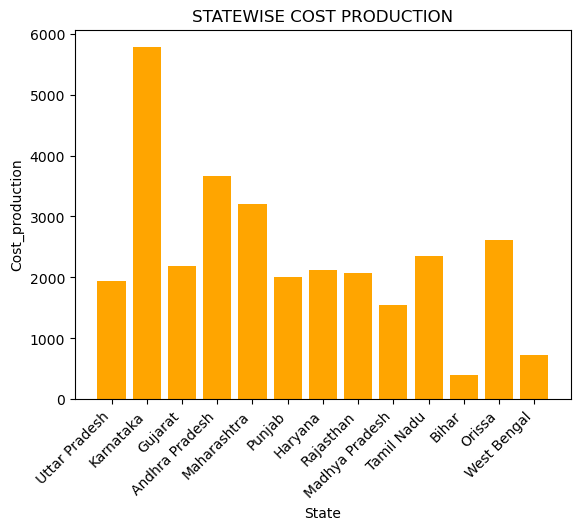

In [93]:
plt.bar(x='State',height='Cost of Production (`/Quintal) C2',data=data5,color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('STATEWISE COST PRODUCTION')
plt.xlabel("State")
plt.ylabel("Cost_production")
plt.show()

Text(0.5, 1.0, 'Cost of Cultivation of every crop')

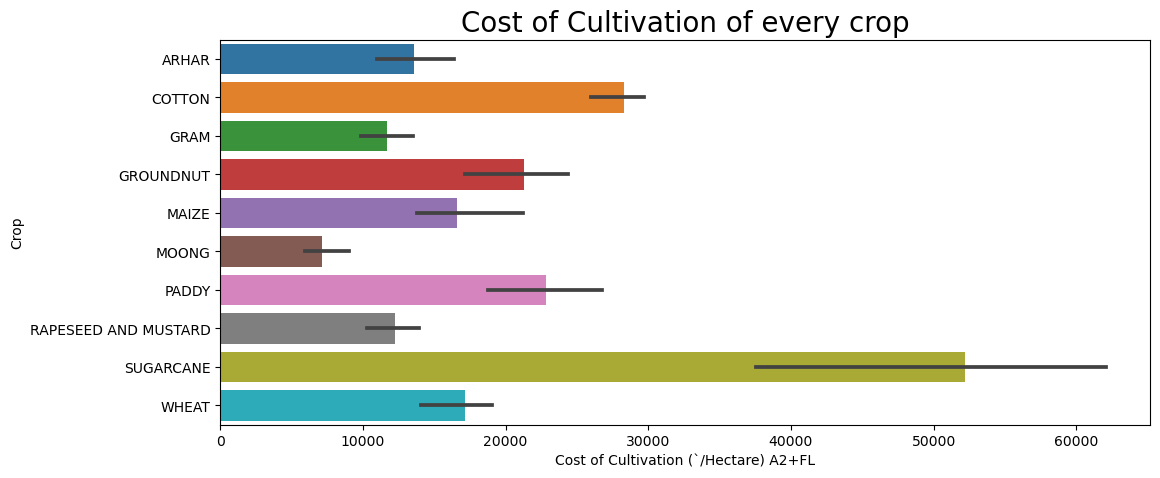

In [96]:
plt.figure(figsize=(12,5))
sns.barplot(data=data5,x='Cost of Cultivation (`/Hectare) A2+FL',y='Crop')
plt.title("Cost of Cultivation of every crop",size=20)

Text(0.5, 1.0, 'Statewise Cost of Cultivation')

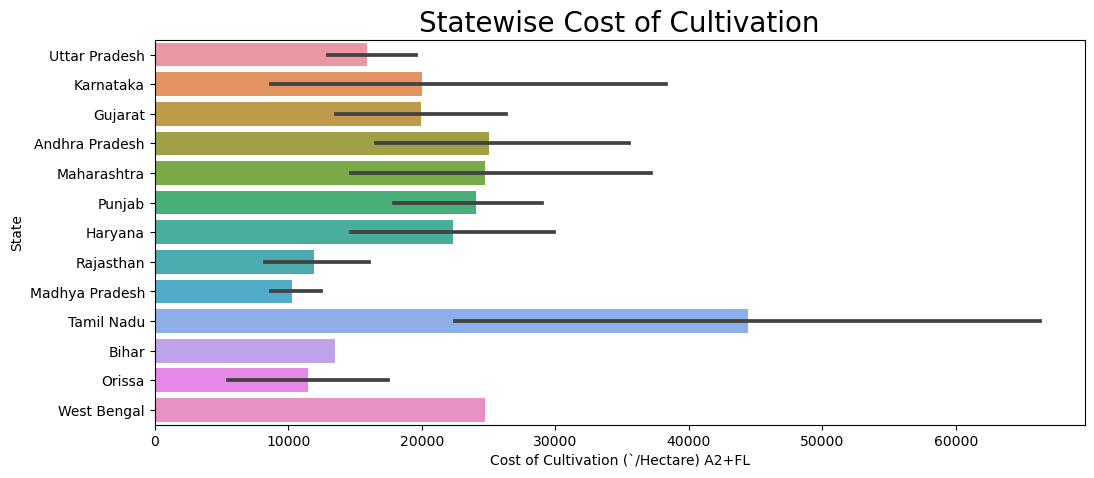

In [98]:
plt.figure(figsize=(12,5))
sns.barplot(data=data5,x='Cost of Cultivation (`/Hectare) A2+FL',y='State')
plt.title("Statewise Cost of Cultivation",size=20)

Text(0.5, 1.0, 'Statewise Yield')

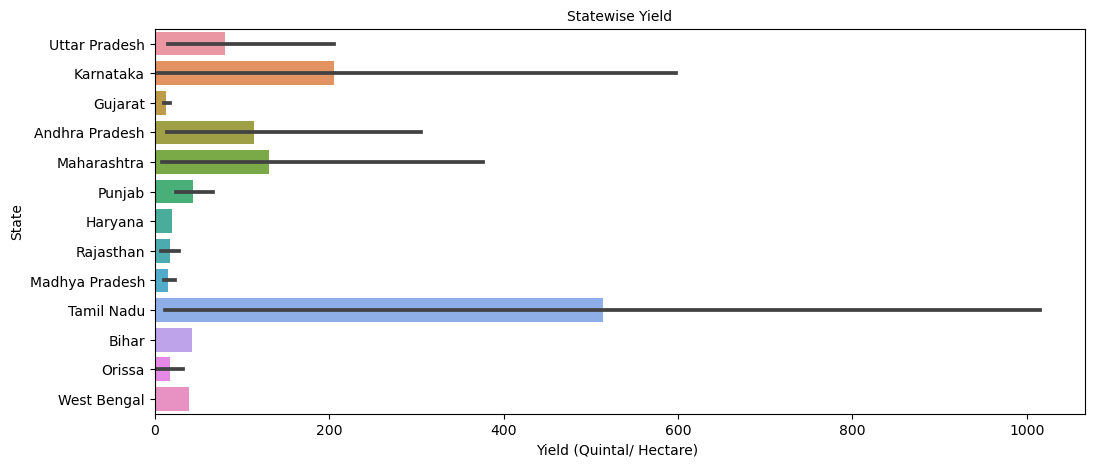

In [109]:
plt.figure(figsize=(12,5))
sns.barplot(data=data5,x='Yield (Quintal/ Hectare) ',y='State')
plt.title("Statewise Yield",size=10)

Text(0.5, 1.0, 'Yield of every crop')

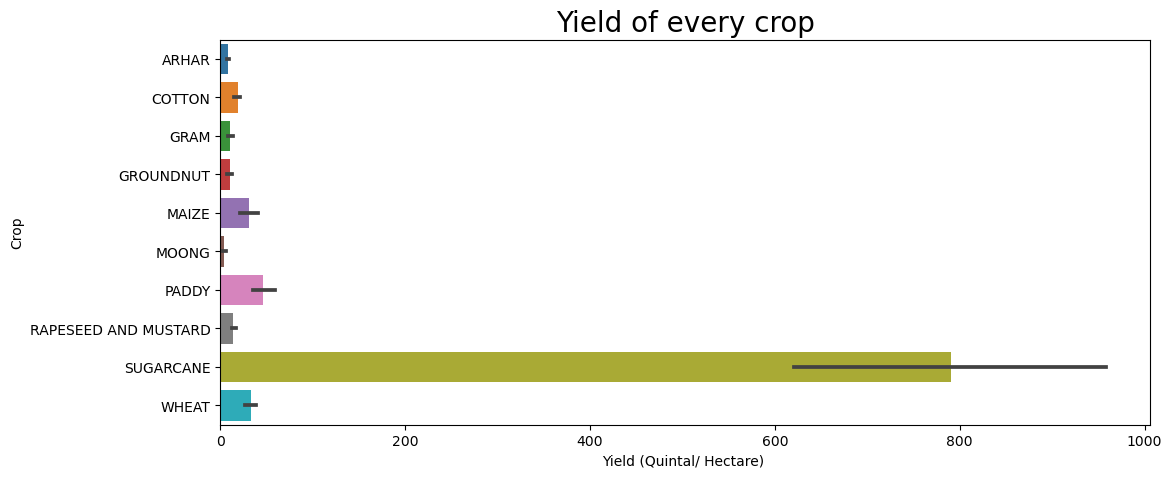

In [113]:
plt.figure(figsize=(12,5))
sns.barplot(data=data5,x='Yield (Quintal/ Hectare) ',y='Crop')
plt.title("Yield of every crop",size=20)

Text(0.5, 1.0, 'Production of Crops from 2006 to 2011')

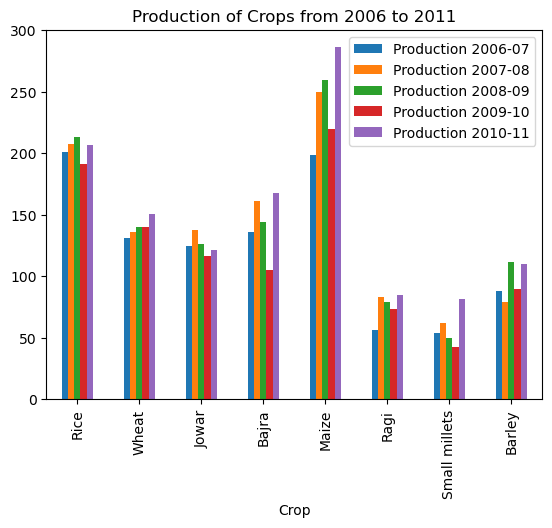

In [119]:
#production of particular crop year wise
df = data2[["Crop","Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"]].head(9)

fig = df.drop(0).plot(kind='bar',x='Crop', y=["Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"])
fig.set_title(label='Production of Crops from 2006 to 2011')

Text(0.5, 1.0, 'Area of Crops from 2006 to 2011')

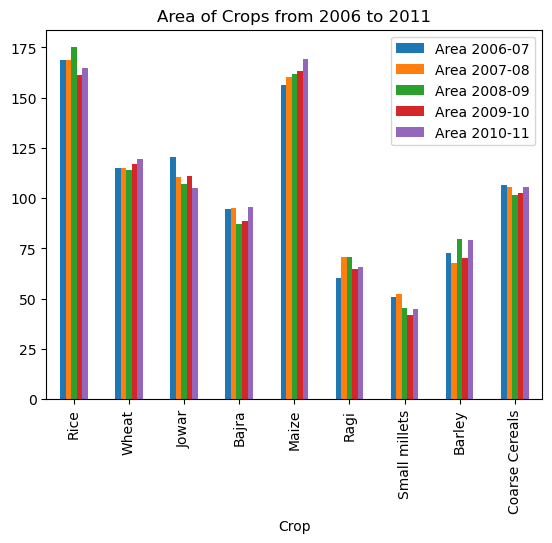

In [121]:
df = data2[["Crop","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"]].head(10)

fig = df.drop(0).plot(kind='bar',x='Crop', y=["Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"])
fig.set_title(label='Area of Crops from 2006 to 2011')

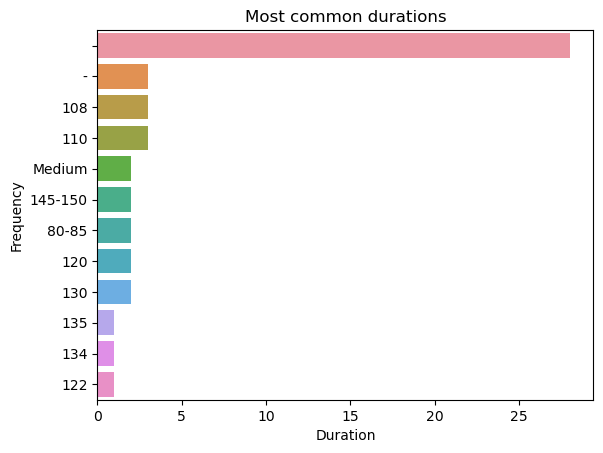

In [126]:
#Most common duration of c rops
new = data3['Season/ duration in days'].value_counts().reset_index().head(12)
sns.barplot(data=new, x='count', y='Season/ duration in days')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Most common durations')
plt.show()

Text(0.5, 1.0, 'Number of States in which most crops are suitable to plant')

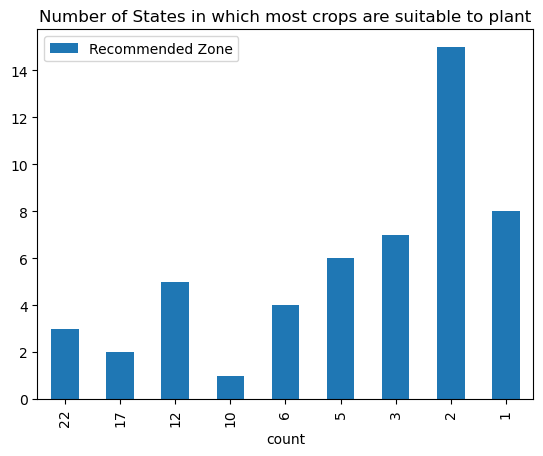

In [134]:
#recommended
fig = data3['Recommended Zone'].str.split(',').str.len().reset_index()['Recommended Zone'].value_counts().reset_index().plot(kind='bar',x='count',y='Recommended Zone')
fig.set_title(label='Number of States in which most crops are suitable to plant')


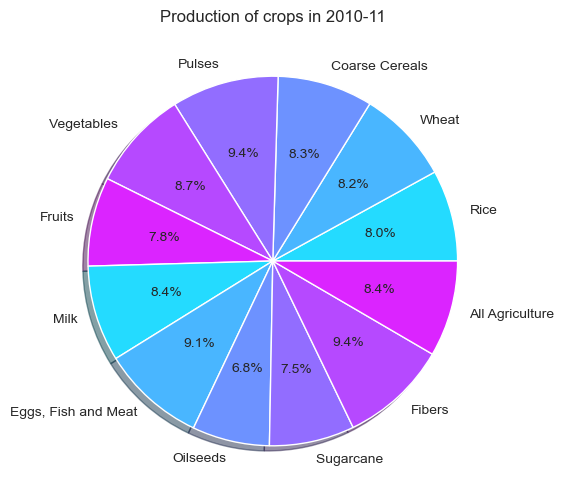

In [136]:
#We have plotted a figure to show a pie chart showing us share of diffrent crops in production in the year 2010-11

plt.figure(figsize=(12,6))
sns.set_style('white')
color=sns.color_palette('cool')
plt.pie(data1['2010-11'],
        labels=data1['Crop'],
        autopct='%0.1f%%',
        shadow= True,
        colors=color)
plt.title('Production of crops in 2010-11')
plt.show()

In [139]:
#Encoding
label_encode=LabelEncoder()

In [141]:
labels=label_encode.fit_transform(data5['Crop'])

In [142]:
print(labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9]


In [143]:
data5['target']=labels

In [145]:
data5.head(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),target
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,0
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,0
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,0
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,0
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,0
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69,1
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39,1
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83,1
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05,1
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90,1


In [146]:
data5=data5.drop(columns='Crop',axis=1)

In [148]:
data5.head(10)

,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),target
0,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,0
1,Karnataka,10593.15,16528.68,2172.46,7.47,0
2,Gujarat,13468.82,19551.90,1898.30,9.59,0
3,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,0
4,Maharashtra,17130.55,25270.26,2775.80,8.72,0
5,Maharashtra,23711.44,33116.82,2539.47,12.69,1
6,Punjab,29047.10,50828.83,2003.76,24.39,1
7,Andhra Pradesh,29140.77,44756.72,2509.99,17.83,1
8,Gujarat,29616.09,42070.44,2179.26,19.05,1
9,Haryana,29918.97,44018.18,2127.35,19.90,1


In [149]:
data5['State'].value_counts()

State
Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Karnataka         5
Rajasthan         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Haryana           2
Tamil Nadu        2
Orissa            2
Bihar             1
West Bengal       1
Name: count, dtype: int64

In [150]:
data5=data5.drop(columns='State',axis=1)

In [151]:
data5.head()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),target
0,9794.05,23076.74,1941.55,9.83,0
1,10593.15,16528.68,2172.46,7.47,0
2,13468.82,19551.90,1898.30,9.59,0
3,17051.66,24171.65,3670.54,6.42,0
4,17130.55,25270.26,2775.80,8.72,0


In [152]:
#correlation matrix
corr=data5.corr()

<Axes: >

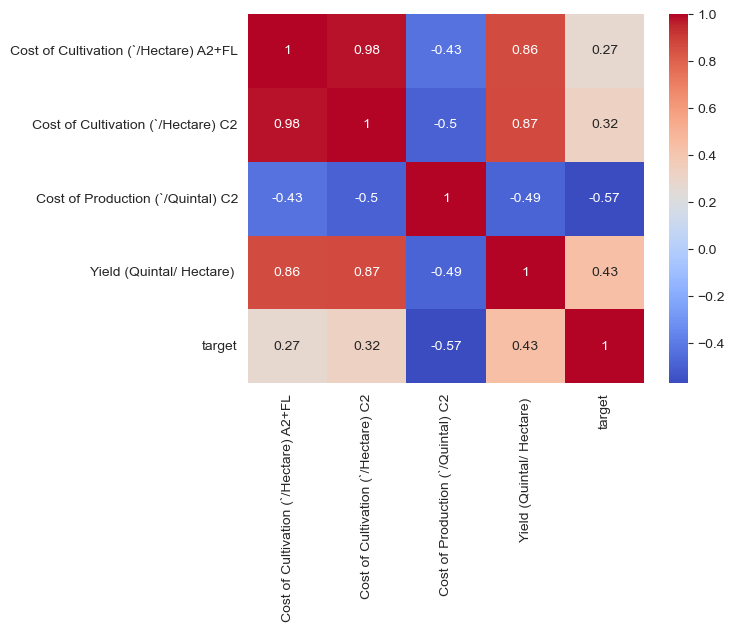

In [153]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm',fmt='.2g')

In [154]:
X=data5.drop(columns='target',axis=1)
Y=data5['target']

In [155]:
#scale the feature from MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
X=scalers.fit_transform(X)


In [158]:
#Standardization of data
scaler=StandardScaler()

In [159]:
X=scaler.fit_transform(X)

In [160]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.22,stratify=Y,random_state=72)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
model = RandomForestClassifier()

In [164]:
sk=model.fit(X_train,Y_train)
sk

RandomForestClassifier()

In [166]:
#accuracy on training data
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
X_train_prediction=sk.predict(X_train).round()
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [167]:
print(X_train_prediction)

[4 0 4 8 5 7 3 2 1 6 5 7 6 0 5 2 2 5 6 1 7 6 2 7 9 9 4 8 1 9 3 0 8 3 0 1 4
 3]


In [168]:
print(training_data_accuracy)

1.0


<Axes: >

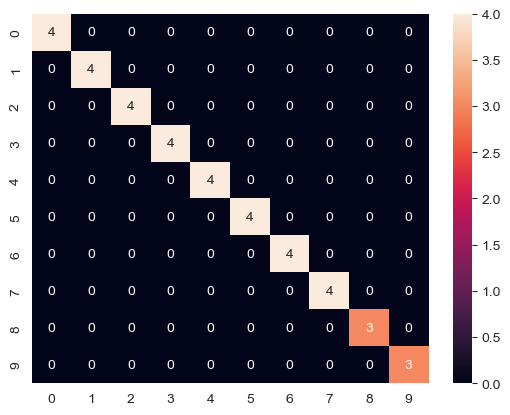

In [172]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_train_prediction,Y_train) 
sns.heatmap(cm, annot=True)

In [173]:
#accuracy on test data
X_test_prediction=sk.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [174]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.7272727272727273


<Axes: >

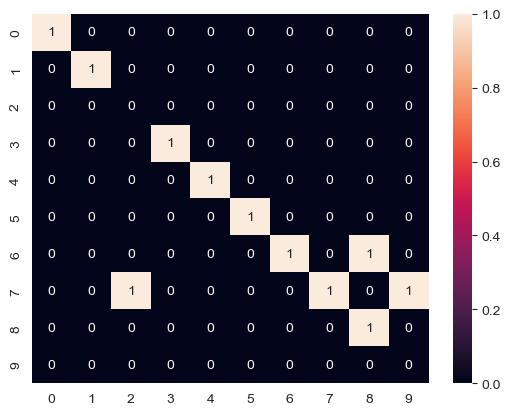

In [175]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_test_prediction,Y_test) 
sns.heatmap(cm, annot=True)

In [176]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_test_prediction)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int64)

In [181]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.33      1.00      0.50         1
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1

    accuracy                           0.73        11
   macro avg       0.68      0.75      0.68        11
weighted avg       0.71      0.73      0.68        11



Text(0.5, 1.0, 'Random Forest classification')

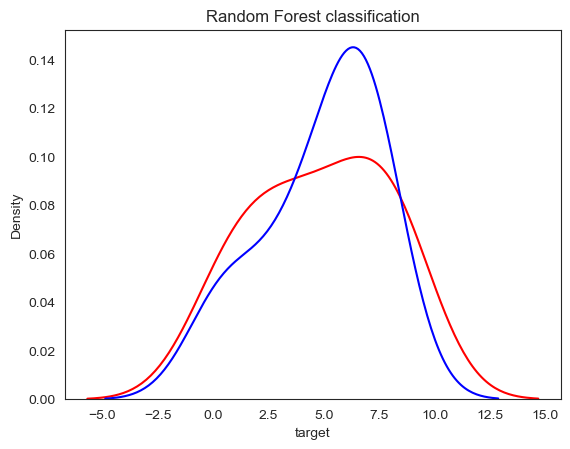

In [182]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_test_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest classification')

In [183]:
# making a predictive System
input_data=(8686.43,17705.93,1279.60,12.94)
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=scaler.transform(std_data)
print(std_data)
prediction=sk.predict(std_data)#model=Randomforest classification
print("target:",prediction)
if(prediction==0):
    print("THE SUITABLE CROP IS: ARHAR")
elif(prediction==1):
    print("THE SUITABLE CROP IS: COTTON")
elif(prediction==2):
    print("THE SUITABLE CROP IS: GRAM")
elif(prediction==3):
    print("THE SUITABLE CROP IS: GROUNDNUT")
elif(prediction==4):
    print("THE SUITABLE CROP IS: MAIZE")
elif(prediction==5):
    print("THE SUITABLE CROP IS: MOONG")
elif(prediction==6):
    print("THE SUITABLE CROP IS: PADDY")   
elif(prediction==7):
    print("THE SUITABLE CROP IS: RAPESEED AND MUSTARD")
elif(prediction==8):
    print("THE SUITABLE CROP IS: SUGARCANE")
elif(prediction==9):
    print("THE SUITABLE CROP IS: WHEAT")
else:
    print("THE SUITABLE CROP IS OTHER THAN THIS")


[[0.05263451 0.11770755 0.20974614 0.0114581 ]]
[[-0.86997553 -0.68672524 -0.31174104 -0.35071961]]
target: [7]
THE SUITABLE CROP IS: RAPESEED AND MUSTARD
